<a href="https://colab.research.google.com/github/AllexFelicio/AllexFelicio/blob/main/AC2_exerciciosPraticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>

----
### <center>Nome e RA dos componentes do grupo</center>

    
| Nome          |      RA      | 
|:-             |:------------:|
|Alex Sander    | 180057       | 
|Kennedy Correa | 160080       | 

    

----
### Instruções
**1**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções

**2**. O trabalho pode ser feito em grupos de até 3 pessoas. Porém, não é permitido que o grupo tenha pessoas de uma turma diferente da sua.  Apenas uma pessoa do grupo deve submeter o trabalho. Você deve submeter apenas o arquivo .ipynb.

**3**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**4**. Não é permitido usar nenhuma outra biblioteca de processamento de imagens além da OpenCV.

**5**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos.

**6**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.memmap import dtype

----
## Exercicio 1

 - a) Crie uma matriz usando a biblioteca numpy.
 - b) Transforme essa matriz em uma imagem que corresponda a bandeira da Malásia, apresentada abaixo. 
 - c) Plote a imagem resultante.
 - d) Salve a imagem resultante na pasta **figsResultado** com o nome **ex01.png**

 <img src="figsNotebook/malasia_flag.png" width="255" height="128" />
 

 
Para gerar a bandeira da Malásia, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **malasia_flagSymbols.png** disponível na pasta **figs** para remover os pontos brancos;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **malasia_flagSymbols.png** disponível na pasta **figs**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

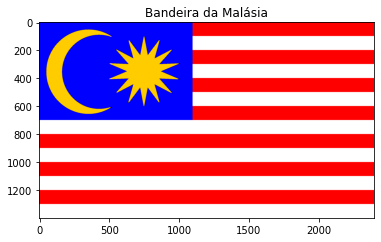

True

In [2]:
##### Resolva o exercício aqui

# abre a imagem setando o oparâmetro IMREAD_UNCHANGED para que 
# ela seja aberta no formato BGRA: um formato igual ao BGR, mas que possui também um canal alpha (a parte transparente)
imgBGRA = cv2.imread('figs/malasia_flagSymbols.png', cv2.IMREAD_UNCHANGED)    

# converte a imagem de BGRA para RGB
imgRGB = cv2.cvtColor(imgBGRA, cv2.COLOR_BGRA2RGB)

# os locais transparentes da imagem BGRA possuem valores 0 no canal alpha (índice 3)
# o código abaixo captura os pixels transparentes da imagem BGRA e transforma os respectivos pixels
# da imagem RGB para vermelho
imgRGB[ imgBGRA[:,:,3] == 0 ] = [0, 0, 255]

#recortando e separando os símbolos
moon = imgRGB[17:623,20:490]
star = imgRGB[645:1150,45:550]

# criando os pixels
bluePixel = [0,0,255]
redPixel = [255,0,0]
whitePixel = [255,255,255]

# inicializa a bandeira com todas as cores brancas
flag = np.zeros([1400,2400,3], dtype=np.uint8)

strip = 100 #contador para identificar a posição da faixa
stripConst = 100 #tamanho da faixa
isFirstStrip = 1 #flag de controle para saber se é a primeira faixa
isRed = 0 #flag de controle para saber se é a vez de pintar uma faixa vermelha

# pinta faixas curtas brancas e vermelhas
for i in range(700):
  if i % stripConst == 0:
      if isFirstStrip == 1:
        flag[0:strip,1100:] = redPixel
        isFirstStrip = 0
      elif isFirstStrip == 0:
        if isRed == 0:
          strip = strip + stripConst
          flag[(strip-stripConst):strip,1100:] = whitePixel
          isRed = 1
        else:
          strip = strip + stripConst
          flag[(strip-stripConst):strip,1100:] = redPixel
          isRed = 0

# pinta faixas inteiras brancas e vermelhas
for i in range(700):
  if i % stripConst == 0:
    if isRed == 0:
          strip = strip + stripConst
          flag[(strip-stripConst):strip,:] = whitePixel
          isRed = 1
    else:
      strip = strip + stripConst
      flag[(strip-stripConst):strip,:] = redPixel
      isRed = 0


# Retirando pontos brancos dos simbolos com erosão e elemento estruturante elipse
elemEstrut = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

moon = cv2.erode( moon, elemEstrut )
star = cv2.erode( star, elemEstrut )

# Pinta parte preta da imagem de azul
flag[0:700,0:1100] = [0,0,255]

# Pinta moon e star de amarelo [255,204,0]
moon[ moon[:,:,2] == 0] = [255,204,-255]
star[ star[:,:,2] == 0] = [255,204,-255]

# Soma moon e star com flag
flag[50:656,50:520] = flag[50:656,50:520] + moon
flag[100:605,500:1005] = flag[100:605,500:1005] + star


# plota a bandeira
plt.imshow(flag)
plt.title('Bandeira da Malásia')
plt.show()
flag =cv2.cvtColor(flag, cv2.COLOR_BGR2RGB)
flag = np.array(flag, np.uint8)
cv2.imwrite("figsResultado/ex01.jpg",flag)

----
## Exercício 2

Sabe-se que é possível reduzir o efeito de borramento de uma imagem por meio da operação de realce de contraste que irá gerar uma nova imagem onde cada pixel $g$ recebe o valor definido pela equação a seguir:

$$g = 
\begin{cases}
f \ominus b \text{, } & \text{ se } f - (f \ominus b) <  ( f \oplus b ) - f \\
f \oplus b\text{, } & \text{ caso contrário }
\end{cases}
$$

Na equação acima, $f \ominus b$ é o resultado da operação de erosão no pixel $f$ usando o elemento estruturante $b$. Por outro lado, $f \oplus b$ é o resultado da operação de dilatação no pixel $f$ usando o elemento estruturante $b$.

Implemente a operação de realce descrita acima e aplique na imagem **img/borramento.jpg**. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex02.png**

Obs: neste exercício só é permitido usar função pronta da biblioteca OpenCV para fazer as operações de erosão e dilatação. 

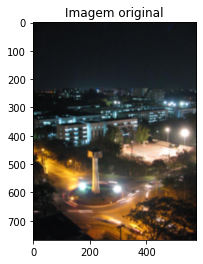

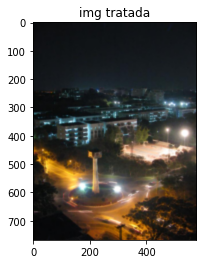

True

In [3]:
##### Resolva o exercício aqui
img = cv2.imread('figs/borramento.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.title('Imagem original')
plt.show()

EstruturaElemen = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,4))

img_erosao = cv2.erode(img, EstruturaElemen)

plt.imshow(img_erosao)
plt.title('img tratada')
plt.show()
img_erosao = cv2.cvtColor(img_erosao, cv2.COLOR_BGR2RGB)
img_erosao = np.array(img_erosao, np.uint8)
cv2.imwrite('figsResultado/ex02.png',img_erosao)


----
## Exercício 3

Sabe-se que é possível reduzir o efeito de borramento de uma imagem $f$ por meio de uma operação de realce de contraste que gera uma nova imagem $g$ resultante da combinação das transformadas **top-hat** e **bottom-hat**, conforme a seguinte equação:

$$g = 
f+TH(f)-BH(f)
$$

Na equação acima, $TH(f)$ é o resultado da transformada  **top-hat** na imagem $f$ e $BH(f)$ é o resultado da operação **bottom-hat** na imagem $f$.

Implemente a operação de realce descrita acima e aplique na imagem **img/borramento.jpg**. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex03.png**

Obs: neste exercício só é permitido usar função pronta da biblioteca OpenCV para fazer as operações de erosão e dilatação. 

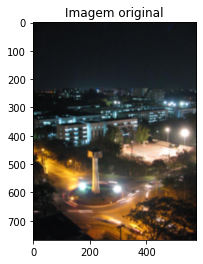

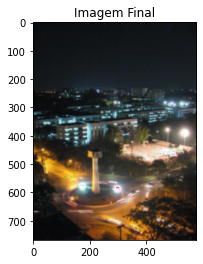

True

In [4]:
##### Resolva o exercício aqui
img = cv2.imread('figs/borramento.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

#mostrando a imagem originall
plt.imshow(img)
plt.title('Imagem original')
plt.show()

#Definindo a estrutura de elemento

EstruturaElemen = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,3))

#aplicando erosao e abertura 
erosao = cv2.erode( img, EstruturaElemen )
Abertura = cv2.dilate(erosao , EstruturaElemen)

#obtendo o top_hat fazendo a img normal - a abertura da erosao
Top_hat = img - Abertura

#aplicando dilatação e fechamento
dilatacao = cv2.dilate(img, EstruturaElemen)
Fechamento = cv2.erode(dilatacao , EstruturaElemen)

#obtendo o botton_hat fazendo o fechamento da dilatação - a img original
Botton_hat = Fechamento - img

#  g   =  f  +  TH(f)  -    BH(f)
result = img + Top_hat - Botton_hat


plt.imshow(result)
plt.title('Imagem Final')
plt.show()

result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB) 
result = np.array(result, np.uint8)

cv2.imwrite('figsResultado/ex03.png', result)


----
## Exercicio 4

Remova o ruído da imagem **facens1_ruido.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem a seguir. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex04.png**

<img src="figsNotebook/facens1_ruidoCorrigido.png" width="500"/>

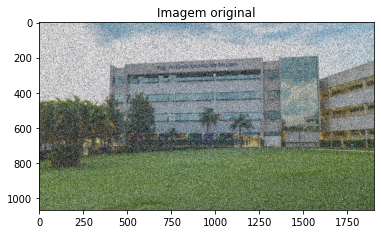

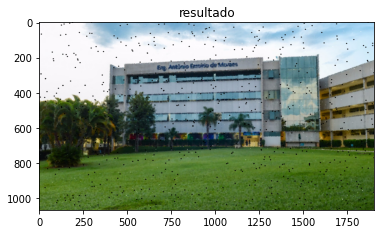

True

In [5]:
##### Resolva o exercício aqui

elemEstrut2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
elemEstrut3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

# abre a imagem  
img = cv2.imread('figs/facens1_ruido.png',cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Imagem original')
plt.show()

# aplica a erosao 
img_erosao3=cv2.erode( img, elemEstrut3 )
img_erosao2=cv2.erode( img, elemEstrut2 )

# aplica a dilatacao
dilatacao = cv2.dilate(img, elemEstrut2)

# como eu ja tenho a imagem com erosao, vou aplicar a dilatacao nessa imagem
imagemAbertura = cv2.dilate( img_erosao2,  elemEstrut3)

# como eu ja tenho a imagem com dilatação, vou aplicar a erosao nessa imagem
imagemFechada = cv2.erode(dilatacao,elemEstrut3)

plt.imshow(imagemFechada)
plt.title('resultado')
plt.show()

imagemFechada = cv2.cvtColor(imagemFechada, cv2.COLOR_BGR2RGB) 
imagemFechada = np.array(imagemFechada, np.uint8)

cv2.imwrite('figsResultado/ex04.png', imagemFechada)


----
## Exercicio 5

Remova o ruído da imagem **facens2_ruido.png** usando um ou mais filtros. O resultado mínimo esperado é apresentado na imagem a seguir. Depois disso, plote a imagem resultante na tela e também salve na pasta **figsResultado** com o nome **ex05.png**

<img src="figsNotebook/facens2_ruidoCorrigido.png" width="500"/>

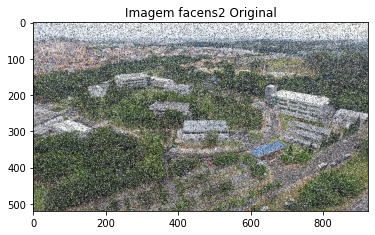

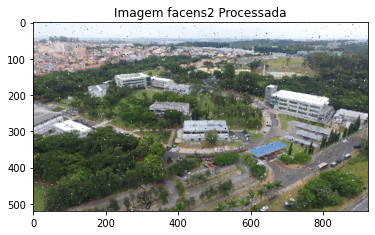

True

In [6]:
##### Resolva o exercício aqui
img = cv2.imread('figs/facens2_ruido.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Imagem facens2 Original')
plt.show()

sharpen = cv2.medianBlur(img,3)

plt.imshow(sharpen)
plt.title('Imagem facens2 Processada')
plt.show()

sharpen = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)
sharpen = np.array(sharpen, np.uint8)
cv2.imwrite('figsResultado/ex05.png', sharpen)


----
## Exercicio 6

Faça uma função chamada **retornaCor** que deve receber uma imagem como entrada e retornar a cor predominante na imagem. Para isso, ela deve extrair o histograma de cada canal de cor da imagem de entrada e fazer uma análise deles para inferir a cor predominante. Teste a função criada nas imagens disponíveis no diretório **figs/objetos/** e imprima o nome de cada arquivo e a cor inferida.

In [7]:
##### Resolva o exercício aqui
def retornarCor (figura):

 #Recebe a imagem e converte para RGB
  obj = cv2.imread(figura)
  obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)

  histo_red = cv2.calcHist([obj], [2], None, [256], [0,256])
  histo_green = cv2.calcHist([obj], [1], None, [256], [0,256])
  histo_blue = cv2.calcHist([obj], [0], None, [256], [0,256])

  valor_red = np.max(histo_red)
  valor_green = np.max(histo_green)
  valor_blue = np.max(histo_blue)


  if (valor_green>valor_blue):
    if (valor_red>valor_blue):
      resposta = " a cor que predomina é o vermelho"
    else:
      resposta = " a cor que predomina é o azul"
  else:
    if (valor_red>valor_green):
      resposta = " a cor que predomina é o verde"
    else:
      resposta = " a cor que predomina é o azul"

  nome_obj = figura.split("/").pop()

  return ("figs/objetos/" + nome_obj + "," + resposta)

print(retornarCor("figs/objetos/objeto1.png"))
print(retornarCor("figs/objetos/objeto2.png"))
print(retornarCor("figs/objetos/objeto3.png"))
print(retornarCor("figs/objetos/objeto4.png"))
print(retornarCor("figs/objetos/objeto5.png"))
print(retornarCor("figs/objetos/objeto6.png"))


figs/objetos/objeto1.png, a cor que predomina é o azul
figs/objetos/objeto2.png, a cor que predomina é o vermelho
figs/objetos/objeto3.png, a cor que predomina é o verde
figs/objetos/objeto4.png, a cor que predomina é o verde
figs/objetos/objeto5.png, a cor que predomina é o vermelho
figs/objetos/objeto6.png, a cor que predomina é o azul


----
## Exercicio 7

Aumentar um único tom de cinza em alguns pixels de uma imagem qualquer irá gerar uma alteração visualmente imperceptível. 

Considerando a afirmação acima, crie uma função chamada **criptografar** que deve receber duas imagens de entrada. Considere que a primeira imagem terá uma dimensão menor ou igual a da segunda imagem. Considere também que a primeira imagem contém um texto de um única cor e de tamanho arbitrário. A função deve retornar uma nova imagem que esconda a primeira imagem na segunda.

 - a limiarização pode ser usada para transformar os tons de cinza da primeira imagem para um tom de cinza desejado
 - uma operação aritmética pode ser usada para esconder a primeira imagem na segunda

Use a função acima para esconder a imagem **figs/mensagemSecreta.png** dentro da imagem **terra.jpg**, mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex07_criptografada.png**

Crie uma função chamada **descriptografar** que deve receber duas imagem. A primeira delas é uma imagem que contém uma mensagem escondida. A segunda imagem é a original antes da operação de criptografia. A função deve retornar uma nova imagem que contenha a mensagem escondida (visível) extraída da primeira imagem fornecida como parâmetro da função. 
 - uma operação aritmética pode ser usada para extrair a imagem escondida
 - a limiarização pode ser usada para transformar os tons de cinza da mensagem escondida em um tom de cinza desejado

Use a função **descriptografar** para revelar a mensagem contida dentro da imagem retornada pela primeira função (**figsAlunos/ex07_criptografada.png**), mostre a imagem resultante na tela e salve na pasta **figsResultado** com o nome **ex07_descriptografada.png**.

Obs: as funções acima devem ser genéricas, ou seja, devem funcionar para quaisquer imagens passadas como entrada.

In [ ]:
##### Resolva o exercício aqui

def criptografar(img1, img2):
  print("criptografar")

def descriptografar(img):
  print("descriptografar")


criptografar("figs/mensagemSecreta.png", "figs/terra.jpg")
descriptografar("figsResultado/ex07_criptografada.png")

----
## Exercicio 8

Crie uma função chamada **separar** que receba o endereço de dois diretório como parâmetro. Essa função deve criar duas subpastas no **segundo** diretório, chamadas **ex08_claro** e **ex08_escuro**. Ela deve identificar automaticamente se cada uma das imagens contidas no primeiro diretório é clara ou escura. 

 - Se a função identificar que a imagem é escura, ela deve fazer a equalização do histograma. Salve a imagem equalizada dentro da pasta **ex08_escuro**.
 
 - Se a função identificar que a imagem é clara, ela deve criar duas novas imagens com versões escurecidas: a primeira deve ser escurecida por meio de subtração, enquanto a segunda deve ser escurecida por meio de multiplicação. Depois disso, faça a equalização das duas imagens escurecidas. Salve as duas imagens escurecidas e suas versões equalizadas dentro da pasta **ex08_claro**.
 - Arredonde valores fracionários gerados pela operação aritmética
 - Trate os valores inválidos gerados pela operação aritmética com a técnica de saturação
 
Teste a função passando como parâmetro os endereços dos diretórios **figs/estrada/** e **figsResultado**, respectivamente.

Dica:
 - para identificar se a imagem é clara ou escura você pode usar informações do histograma

In [ ]:
##### Resolva o exercício aqui
import os
import shutil

def separar(path1,path2):
  images = []

  os.mkdir(path2+"/ex08_claro") #cria pasta ex08_claro
  os.mkdir(path2+"/ex08_escuro") #cria pasta ex08_escuro

  for image in os.listdir(path1): #adiciona o nome de todas as imagens da pasta na lista de imagens
    images.append(image)
  
  for i in images:
    img = cv2.imread(path1+"/"+i,0) #lê a imagem em branco e preto

    # 1) Aplicar equalização do histograma
    imgHistograma = "Aplicar equalização do histograma"

    # 2) Verificar se é imagem escura:
    if (imgHistograma == "Verificar se a imagem tem mais tons próximos de zero"):
      shutil.move(path1+"/"+i, path2+"/ex08_escuro/"+i) #move a imagem de diretório
    else:
      img1 = img
      img2 = img

      # 3) Escurecer img1 por subtração

      # 4) Escurecer img2 por multiplicação

      # 5) Equalizar img1 e img2

      # 6) Salvar img1, img2, e as versões equalizadas delas na pasta: path2+"/ex08_claro"


separar("figs/estrada","figsResultado")

['README.md', 'anscombe.json', 'mnist_train_small.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv']
